
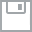
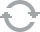
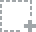
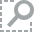
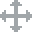
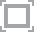
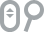
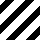
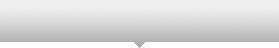
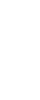
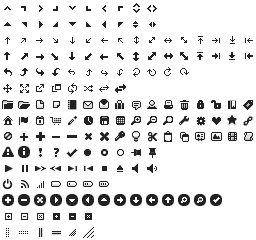
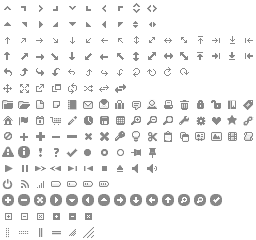
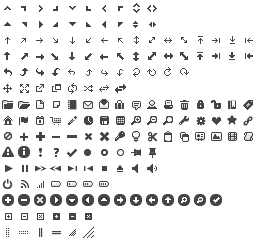
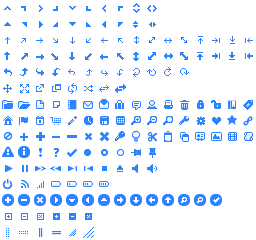
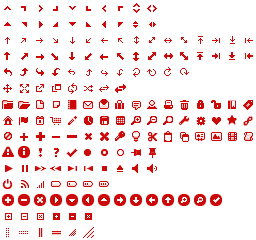
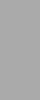
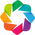
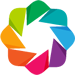

In [7]:
import arrow
import numpy as np
from __future__ import division
from sympy import *
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from IPython.html import widgets
from IPython.display import display

output_notebook()
sympy_expr_list = []

def discritize_dates(start_epoch_date, end_epoch_date, number_of_pixels):
    """yield epoch dates based on pixel counts in the chart"""
    yield np.linspace(start_epoch_date, end_epoch_date, int=number_of_pixels, dtype=np.int32)

class Graph():
    def __init__(self, x, y): # pixels
        self.x_future = int(x/2)
        self.x_past = int(x/2)
        self.x = x
        self.y = y
    
    @property
    def average_return(self): #e.g. average of sympy_expr's 5 year projections, but I don't know if this belongs here
        return self._average_return
        
    @average_return.setter
    def average_return(self,value):
        self._average_return=value
    
    def add_sympy_expr(self,value):
        self.sympy_expr_list.append(value)

    def clear_sympy_exprs(self):
        self.sympy_expr_list=[]

    def get_probability_fn_or_value_for_datetime(datetime= arrow.now(), expr= expr.Expr(Eq)): 
        """the y is the probability at x=time"""
        y,x = sympy.symbols('y x')
        sympy.Eq(y,x)

        
def titration_graph(graph):
    """I need to get all the functions of all the market types"""
    
    p1 = figure(x_axis_type = "datetime")

#    p1.line(np.array(AAPL['date'], 'M64'), AAPL['adj_close'], color='#A6CEE3', legend='AAPL')
#    p1.line(np.array(FB['date'], 'M64'), map(bond.recieved_distributions_at_time, FB['date'], color='#1F78B4', legend='FB'))
    N = graph.x_future
    M = graph.y
    img = np.empty((N,M), dtype=np.uint32) # N,M is correct
    view = img.view(dtype=np.uint8).reshape((N, M, 4)) #view is a re-interpretation of the same data

    for i in range(N):
        for j in range(M):
            view[i, j, 0] = 0  #red
            view[i, j, 1] = int(i/N*160)  #green
            view[i, j, 2] = int(j/N*255)  #blue
            view[i, j, 3] = int(i/N*255)  #alpha

    p = figure(x_range=[1446390572,1446390582], y_range=[0,10]) #changes the view window
    p.image_rgba(image=[img], x=[1446390572], y=[0], dw=[20], dh=[10]) #changes the location and stretches the artifact to be displayed
    
    show(p)

a = Graph(400,400)
titration_graph(a)

In [8]:
arrow.now().timestamp

1446390627

In [5]:
import arrow
import time
import datetime as dt
class Bond():
    """ I know, I know (because this is only one function other than __init__())
    this could be shrunk to one function but I would rather have a class with different instances"""
    def __init__(self,
                 start_date=arrow.utcnow(),
                 principle = None,
                 coupon_rate = .05,
                 coupon_rate_distribution_interval=None, #dt.timedelta()
                 end_date=None):
        self.principle = principle
        self.start_date = start_date
        self.coupon_rate_distribution_interval=coupon_rate_distribution_interval or dt.timedelta(days=180)
        int(arrow.util.timedelta.total_seconds(dt.timedelta(days=180)))
        self.end_date = end_date or start_date.replace(years=+30)
        self.coupon_rate = coupon_rate
        self.one_time_distribution = coupon_rate*principle

    def recieved_distributions_at_time(self, query_date = arrow.utcnow().replace(years=+1)):
        recieved_distributions = 0
        if query_date > self.end_date:
            query_date = self.end_date 
            recieved_distributions += self.principle
        a = int(self.coupon_rate_distribution_interval.total_seconds())
        no_of_distributions =int((query_date.timestamp-self.start_date.timestamp)//a)
        recieved_distributions += self.principle *self.coupon_rate*no_of_distributions
        return recieved_distributions

In [3]:
import csv
class Person():
    """this is to keep track of a person's portfolio"""
    #username: not relivant - only use 3rd party login methods
    #password: not relivant - only use 3rd party login methods
    def __init__(self):
        self.bank_accts = [] #see how yoddlee handles this.
        self.brokerage_accts = [] #see how yoddlee handles this.
        #self.first_name = "" # no reason to save this information as of yet, creates a liability
        #self.last_name = "" # no reason to save this information as of yet, creates a liability
        self.email = '' #this is also the username
        self.language = 'en-us'
        self.bonds = []

    def to_csv(self, csvfilename):
        datawriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
        if self.bonds:
            for ctr, bond in enumerate(self.bonds):
                with open(csvfilename, 'w+', newline='\n') as csvfile:
                    spamwriter.writerow([self.email, 'bond', ctr, 
                         bond.start_date, 
                         bond.principle,
                         bond.coupon_rate,
                         bond.coupon_rate_distribution_interval, 
                         bond.self.end_date, 
                         ])
                    
    def from_csv(self, csvfilename):
        with open(csvfilename, newline='') as csvfile:
            csvread = csv.reader(csvfile, delimiter=',', quotechar='"')
            for row in csvread:
                if row[0]==self.email and row[1]=='bond':
                    self.bonds.append(Bond(row[2:]))
                    #self.start_date, self.principle, self.coupon_rate, self.coupon_rate_distribution_interval, self.end_date = row[2:]
                    
    def __repr__(self):
        return self.email
    def __str__(self):
        return self.email
    def load_accounts(self):
        for acc in self.bank_accts:
#            acc.connect
            pass

class Bank(): #might get replaced by yoddlee
    """contains connection api information for a bank"""
    def __init__(self):
        pass
    def __repr__(self):
        return self.name
    def __str__(self):
        return self.name
    def __enter__(self):
        pass
        #connection start here
    
    def __exit__(self):
        pass
        #connection terminate
        
class Brokerage():  #might get replaced by yoddlee
    """contains connection information for a brokerage firm"""
    def __init__(self):
        pass

In [4]:
b = Bond(principle = 1000, start_date = arrow.utcnow().replace(years=-5), end_date = arrow.utcnow()) #create a 1000 bond starting 5 years ago, ending now
b.recieved_distributions_at_time(query_date=arrow.utcnow().replace(days=-26))

500.0

In [5]:
from datetime import timedelta
d = timedelta(days=1)
d.days

1

In [6]:
a = Graph(10,5)

In [7]:
#b = titration_graph(a)

In [8]:
import sympy

In [9]:
from sympy.tensor import IndexedBase, Idx
from sympy import symbols
M = IndexedBase('M')
i, j = symbols('i j', cls=Idx)
i = 2
j = 3
expr = sympy.Eq(M[2,3], 23)
M[i, j]

M[2, 3]

In [10]:
c = np.empty([3,5], dtype=np.dtype(np.int32))

In [11]:
arrow.utcnow()-dt.timedelta(days=180)

<Arrow [2015-04-15T02:52:34.761133+00:00]>

In [12]:
int(dt.timedelta(days=180).total_seconds())

15552000

In [ ]:
np.nper(rate, pmt, pv, fv=0, when='end') #Compute the number of periodic payments.